In [1]:
import pandas as pd
import seaborn as sns
from sklearn import svm
from numpy import mean
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, cross_val_score
import pickle

C:\Users\assas\AppData\Local\Temp\ipykernel_10052\2660289887.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
train = pd.read_csv('../../SIFTextraction/fracatlas/train.csv')
test = pd.read_csv('../../SIFTextraction/fracatlas/test.csv')
train

,image_id,hand,leg,hip,shoulder,mixed,label,0,1,2,...,190,191,192,193,194,195,196,197,198,199
0,IMG0000375.jpg,0,1,0,0,0,0,-0.242657,-0.211284,-0.325812,...,-0.206691,-0.248059,-0.045642,-0.209752,-0.266092,-0.301074,-0.22646,-0.213012,-0.251152,-0.246858
1,IMG0003873.jpg,1,0,0,1,1,0,-0.242657,-0.211284,-0.161014,...,-0.206691,-0.033561,-0.045642,-0.209752,-0.266092,-0.301074,-0.22646,-0.213012,-0.090127,-0.246858
2,IMG0002796.jpg,0,1,0,0,0,0,-0.242657,-0.211284,-0.325812,...,-0.206691,0.180938,-0.252104,-0.209752,-0.266092,-0.301074,-0.22646,-0.213012,-0.251152,0.017050
3,IMG0003700.jpg,1,0,0,0,0,0,-0.242657,-0.211284,-0.161014,...,-0.094276,-0.248059,-0.252104,-0.209752,-0.266092,-0.301074,-0.22646,-0.213012,-0.251152,-0.246858
4,IMG0003388.jpg,0,1,0,0,0,0,-0.242657,-0.211284,0.003784,...,-0.094276,-0.033561,-0.252104,-0.209752,0.043732,-0.301074,-0.22646,-0.213012,-0.090127,-0.246858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,IMG0001188.jpg,0,1,0,0,0,0,-0.242657,-0.211284,-0.325812,...,-0.206691,-0.248059,-0.252104,-0.209752,-0.266092,-0.301074,-0.22646,-0.213012,-0.251152,-0.246858
3262,IMG0001452.jpg,0,1,0,0,0,0,-0.242657,-0.211284,-0.161014,...,-0.206691,-0.248059,-0.252104,-0.209752,0.043732,-0.301074,-0.22646,-0.213012,-0.251152,0.017050
3263,IMG0001181.jpg,0,1,0,0,0,0,-0.242657,-0.211284,-0.325812,...,-0.206691,-0.248059,-0.252104,-0.209752,-0.266092,-0.301074,-0.22646,-0.036574,-0.251152,-0.246858
3264,IMG0001696.jpg,0,0,1,0,0,0,-0.242657,0.088609,0.168583,...,-0.206691,-0.033561,-0.252104,-0.209752,0.043732,0.029783,-0.22646,-0.213012,-0.251152,-0.246858


In [3]:

X_train = train.drop(columns=['image_id', 'label'])
y_train = train['label']

X_test = test.drop(columns=['image_id', 'label'])
y_test = test['label']


model = svm.SVC(gamma='scale')

param_grid = {
    'class_weight': ({0:1, 1:2}, {0:1,1:4}, {0:1,1:5}),
    'kernel': ('rbf', 'sigmoid'),
    'C': (2, 3),
    'degree': (2, 3)
}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='f1')

grid_result = grid.fit(X_train, y_train)

# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.476774 using {'C': 3, 'class_weight': {0: 1, 1: 4}, 'degree': 2, 'kernel': 'rbf'}
0.357335 (0.067119) with: {'C': 2, 'class_weight': {0: 1, 1: 2}, 'degree': 2, 'kernel': 'rbf'}
0.357703 (0.046337) with: {'C': 2, 'class_weight': {0: 1, 1: 2}, 'degree': 2, 'kernel': 'sigmoid'}
0.357335 (0.067119) with: {'C': 2, 'class_weight': {0: 1, 1: 2}, 'degree': 3, 'kernel': 'rbf'}
0.357703 (0.046337) with: {'C': 2, 'class_weight': {0: 1, 1: 2}, 'degree': 3, 'kernel': 'sigmoid'}
0.470710 (0.049759) with: {'C': 2, 'class_weight': {0: 1, 1: 4}, 'degree': 2, 'kernel': 'rbf'}
0.341994 (0.036009) with: {'C': 2, 'class_weight': {0: 1, 1: 4}, 'degree': 2, 'kernel': 'sigmoid'}
0.470710 (0.049759) with: {'C': 2, 'class_weight': {0: 1, 1: 4}, 'degree': 3, 'kernel': 'rbf'}
0.341994 (0.036009) with: {'C': 2, 'class_weight': {0: 1, 1: 4}, 'degree': 3, 'kernel': 'sigmoid'}
0.438872 (0.033821) with: {'C': 2, 'class_weight': {0: 1, 1: 5}, 'degree': 2, 'kernel': 'rbf'}
0.340076 (0.032868) with: {'C': 2, 'cla

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       674
           1       0.36      0.45      0.40       143

    accuracy                           0.76       817
   macro avg       0.62      0.64      0.62       817
weighted avg       0.78      0.76      0.77       817

Confusion Matrix:


<Axes: >

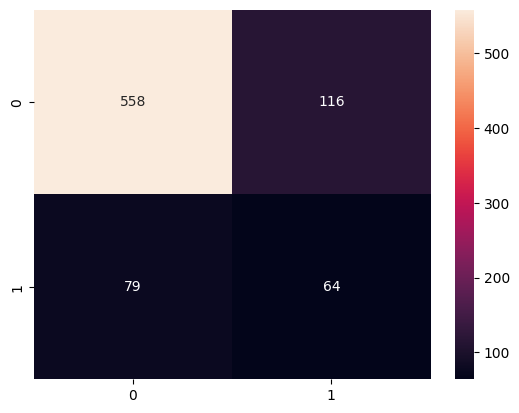

In [4]:
weigths = grid_result.best_params_['class_weight']
model = svm.SVC(gamma='scale', class_weight=weigths, kernel=grid_result.best_params_['kernel'], C=grid_result.best_params_['C'], degree=grid_result.best_params_['degree'])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt='d')

In [5]:
pickle.dump(model, open('./models/svc.pkl', 'wb'))

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.metrics import classification_report

# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'AUC', 'Precision', 'Recall'])
callback = EarlyStopping(monitor='AUC', patience=3)
# Fit the model to the training data
model.fit(np.asarray(X_train).astype('float32'), np.asarray(y_train).astype('float32'), epochs=50, batch_size=64, class_weight={0: 1, 1: 6}, callbacks=[callback])

Epoch 1/50
52/52 [==============================] - 3s 11ms/step - loss: 1.3115 - accuracy: 0.7137 - auc: 0.6199 - precision: 0.2864 - recall: 0.4216
Epoch 2/50
52/52 [==============================] - 0s 9ms/step - loss: 1.1310 - accuracy: 0.6494 - auc: 0.7466 - precision: 0.2991 - recall: 0.7404
Epoch 3/50
52/52 [==============================] - 0s 7ms/step - loss: 1.0471 - accuracy: 0.6555 - auc: 0.7819 - precision: 0.3077 - recall: 0.7683
Epoch 4/50
52/52 [==============================] - 0s 7ms/step - loss: 0.9856 - accuracy: 0.6926 - auc: 0.8108 - precision: 0.3391 - recall: 0.7892
Epoch 5/50
52/52 [==============================] - 0s 7ms/step - loss: 0.9651 - accuracy: 0.7070 - auc: 0.8190 - precision: 0.3486 - recall: 0.7683
Epoch 6/50
52/52 [==============================] - 0s 7ms/step - loss: 0.9362 - accuracy: 0.7229 - auc: 0.8315 - precision: 0.3664 - recall: 0.7909
Epoch 7/50
52/52 [==============================] - 0s 8ms/step - loss: 0.9203 - accuracy: 0.7336 - auc: 

In [7]:
# Predict on the test data
y_pred = model.predict(np.asarray(X_test).astype('float32'))

# Convert predictions to binary labels
y_pred_binary = np.round(y_pred)

# Generate classification report
report = classification_report(np.asarray(y_test).astype('float32'), y_pred_binary)
print("Classification Report:")
print(report)

26/26 [==============================] - 0s 2ms/step
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88       674
         1.0       0.46      0.52      0.49       143

    accuracy                           0.81       817
   macro avg       0.68      0.69      0.68       817
weighted avg       0.82      0.81      0.81       817



<Axes: >

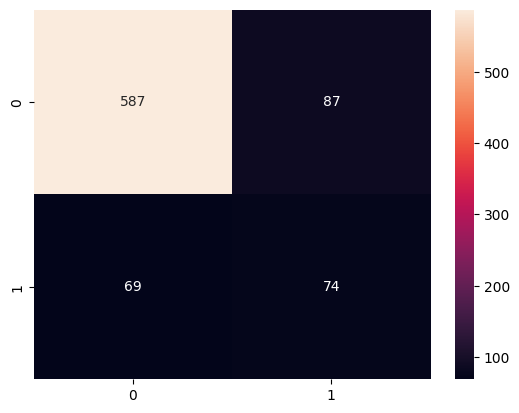

In [8]:
sns.heatmap(confusion_matrix(y_test,y_pred_binary),annot = True,fmt='d')

In [9]:
model.save('./models/nn.h5')

In [10]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'criterion': ('gini', 'entropy'),
    'splitter': ('best', 'random'),
    'max_depth': (None, 10, 20, 30)
}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
model = DecisionTreeClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='f1')

grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_ , grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.403573 using {'criterion': 'gini', 'max_depth': None, 'splitter': 'best'}
0.403573 (0.047210) with: {'criterion': 'gini', 'max_depth': None, 'splitter': 'best'}
0.400099 (0.043645) with: {'criterion': 'gini', 'max_depth': None, 'splitter': 'random'}
0.396485 (0.061108) with: {'criterion': 'gini', 'max_depth': 10, 'splitter': 'best'}
0.399099 (0.061466) with: {'criterion': 'gini', 'max_depth': 10, 'splitter': 'random'}
0.394624 (0.058518) with: {'criterion': 'gini', 'max_depth': 20, 'splitter': 'best'}
0.383174 (0.059698) with: {'criterion': 'gini', 'max_depth': 20, 'splitter': 'random'}
0.392341 (0.047705) with: {'criterion': 'gini', 'max_depth': 30, 'splitter': 'best'}
0.376912 (0.044784) with: {'criterion': 'gini', 'max_depth': 30, 'splitter': 'random'}
0.402262 (0.064507) with: {'criterion': 'entropy', 'max_depth': None, 'splitter': 'best'}
0.393169 (0.044195) with: {'criterion': 'entropy', 'max_depth': None, 'splitter': 'random'}
0.397706 (0.063905) with: {'criterion': 'ent

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       674
           1       0.40      0.45      0.42       143

    accuracy                           0.79       817
   macro avg       0.64      0.65      0.65       817
weighted avg       0.80      0.79      0.79       817

Confusion Matrix:


<Axes: >

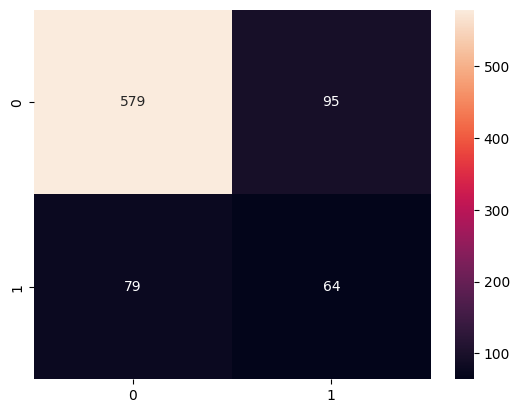

In [13]:
model = DecisionTreeClassifier(criterion='gini', max_depth=None, splitter='best')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt='d')

In [14]:
pickle.dump(model, open('./models/dt.pkl', 'wb'))